In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import plotly.express as px
import os


In [19]:
# Create output directory for saved visualizations if it doesn't exist
output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory created/verified: {output_dir}")

Output directory created/verified: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data


In [20]:
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak_mapped.csv')
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\DOE_mapped.csv')

In [21]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


In [22]:
# Rename 'State' column to 'statecode' in compstak_df for consistent analysis
compstak_df = compstak_df.rename(columns={'State': 'statecode'})

# Verify column names in both dataframes
print("ComptStak DF columns:", compstak_df.columns.tolist())
print("DOE DF columns:", doe_df.columns.tolist())

ComptStak DF columns: ['Property Type', 'Property Subtype', 'Property Id', 'statecode', 'DOE_Compliant_Property_Type']
DOE DF columns: ['statecode', 'reported_propertytype', 'reported_propertysubtype', 'compstak_equivalent_category']


In [23]:
internet_data = {
    'Retail': 1070000,       # 1.07 million brick-and-mortar retail establishments as of 2023
    'Industrial': 350000,     # Includes warehouses, manufacturing facilities, etc.
    'Office': 569311,         # Includes Class A, B, and C office buildings as of 2018
    'Multi-Family': 5200000,  # Includes duplexes, triplexes, and apartment buildings
    'Hotel': 116873,         # Number of hotels and motels as of 2025
    'Mixed-Use': 580000,     # Buildings combining residential with commercial use (apartments within)
    'Land': 13100000,        # Total commercial land parcels across all U.S. states
    'Other': None,            # Includes education, medical, religious facilities (included in total)
}

In [24]:
us_commercial_properties = {
    'CA': 917860, 'TX': 733648, 'FL': 735652, 'NY': 536608, 'IL': 519616,
    'PA': 438648, 'OH': 407557, 'GA': 444143, 'NC': 313187, 'MI': 369983,
    'WA': 246208, 'AZ': 272797, 'MA': 371710, 'VA': 267936, 'CO': 224418,
    'IN': 428138, 'TN': 270544, 'MO': 192733, 'WI': 190274, 'MN': 160773,
    'AL': 323716, 'SC': 189736, 'KY': 76415, 'OR': 145157, 'OK': 144752,
    'CT': 138387, 'IA': 81338, 'MS': 131969, 'AR': 122634, 'KS': 90904,
    'NV': 113336, 'UT': 102769, 'NM': 57693, 'NE': 55961, 'WV': 54143,
    'ID': 41460, 'HI': 26275, 'ME': 73831, 'NH': 60537, 'RI': 48317,
    'MT': 43219, 'DE': 36816, 'SD': 34215, 'ND': 32846, 'AK': 22410,
    'VT': 21740, 'WY': 20549, 'DC': 35878
}

# Analysis of DOE Data Coverage

Compare the DOE dataset with reference data on property types and state-level commercial property counts.

In [25]:
# Analyze DOE data by property type and compare to internet data
# First, count properties by type in DOE dataset
doe_property_counts = doe_df['compstak_equivalent_category'].value_counts().reset_index()
doe_property_counts.columns = ['Property_Type', 'DOE_Count']

# Create comparison DataFrame with internet data
internet_data_df = pd.DataFrame(list(internet_data.items()), columns=['Property_Type', 'Internet_Count'])

# Merge the two datasets
property_comparison = doe_property_counts.merge(internet_data_df, on='Property_Type', how='left')

# Calculate coverage percentage where Internet_Count is available
property_comparison['Coverage_Percentage'] = (property_comparison['DOE_Count'] / property_comparison['Internet_Count'] * 100).round(2)

# Fill NaN values in Coverage_Percentage for rows where Internet_Count is None
property_comparison.loc[property_comparison['Internet_Count'].isna(), 'Coverage_Percentage'] = None

property_comparison

,Property_Type,DOE_Count,Internet_Count,Coverage_Percentage
0,Retail,931077,1070000.0,87.02
1,Industrial,438534,350000.0,125.30
2,Office,388432,569311.0,68.23
3,Multi-Family,253361,5200000.0,4.87
4,Other,161804,NaN,NaN
5,Hotel,73277,116873.0,62.70


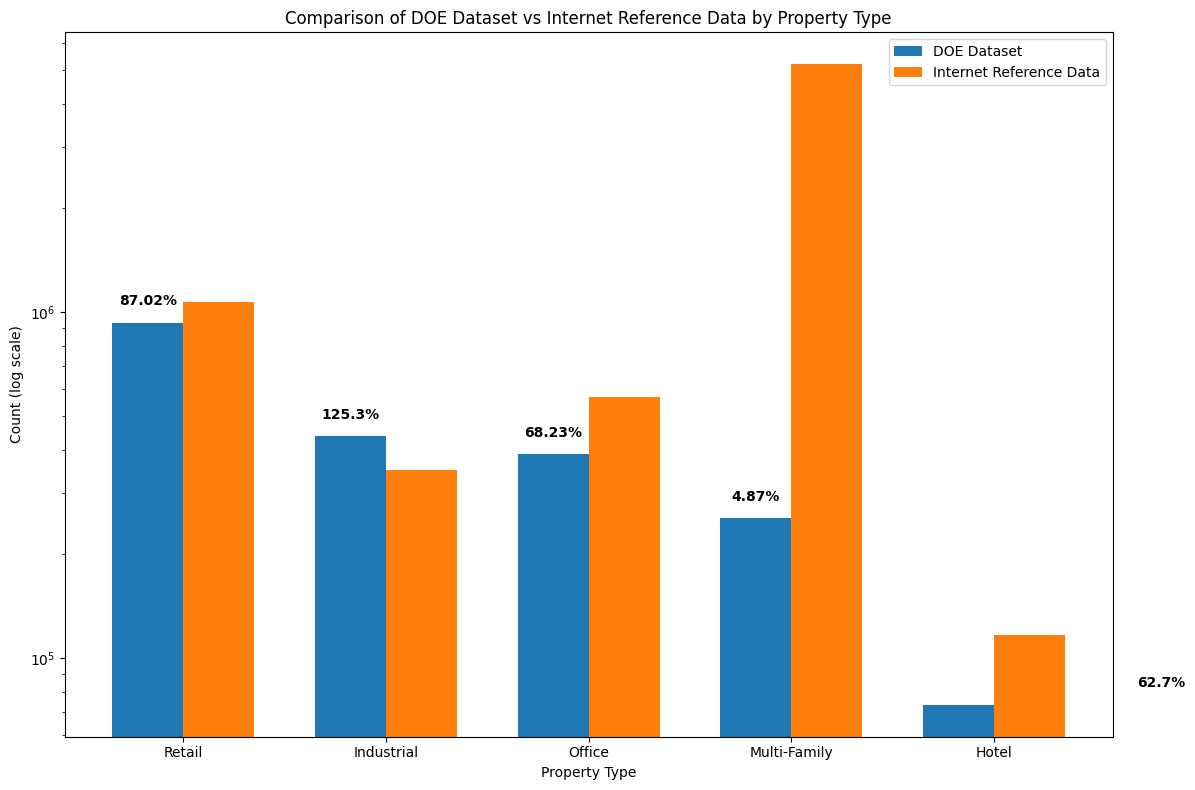

In [26]:
# Visualize property type comparison
# Filter out property types with None values in Internet_Count
plot_data = property_comparison.dropna(subset=['Internet_Count']).copy()

# Create a bar chart comparing DOE counts with internet data counts
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.35
index = np.arange(len(plot_data))

# Create bars
bar1 = ax.bar(index, plot_data['DOE_Count'], bar_width, label='DOE Dataset')
bar2 = ax.bar(index + bar_width, plot_data['Internet_Count'], bar_width, label='Internet Reference Data')

# Add labels and title
ax.set_xlabel('Property Type')
ax.set_ylabel('Count (log scale)')
ax.set_title('Comparison of DOE Dataset vs Internet Reference Data by Property Type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(plot_data['Property_Type'])
ax.set_yscale('log')  # Log scale for better visualization of large differences
ax.legend()

# Add coverage percentage as text on the bars
for i, row in plot_data.iterrows():
    ax.text(i, row['DOE_Count'] * 1.1, f"{row['Coverage_Percentage']}%", 
            ha='center', va='bottom', rotation=0, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'property_type_comparison.png'), dpi=300)
plt.show()

In [27]:
# Analyze DOE data by state and compare to reference state data
# Count properties by state in DOE dataset
doe_state_counts = doe_df['statecode'].value_counts().reset_index()
doe_state_counts.columns = ['State', 'DOE_Count']

# Create comparison DataFrame with internet data
state_data_df = pd.DataFrame(list(us_commercial_properties.items()), columns=['State', 'Reference_Count'])

# Merge the two datasets
state_comparison = doe_state_counts.merge(state_data_df, on='State', how='right')

# Calculate coverage percentage
state_comparison['Coverage_Percentage'] = (state_comparison['DOE_Count'] / state_comparison['Reference_Count'] * 100).round(2)

# Fill NaN values for states not in DOE dataset
state_comparison['DOE_Count'] = state_comparison['DOE_Count'].fillna(0)
state_comparison['Coverage_Percentage'] = state_comparison['Coverage_Percentage'].fillna(0)

# Sort by coverage percentage for better visualization
state_comparison = state_comparison.sort_values('Coverage_Percentage', ascending=False)

state_comparison

,State,DOE_Count,Reference_Count,Coverage_Percentage
35,ID,15224,41460,36.72
22,KY,26124,76415,34.19
26,IA,24466,81338,30.08
19,MN,45863,160773,28.53
25,CT,38398,138387,27.75
6,OH,109843,407557,26.95
18,WI,50419,190274,26.50
0,CA,238844,917860,26.02
34,WV,13711,54143,25.32
8,NC,79107,313187,25.26


In [28]:
# Create a choropleth map of DOE dataset coverage by state
fig = px.choropleth(state_comparison,
                    locations='State',
                    locationmode='USA-states',
                    color='Coverage_Percentage',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='DOE Dataset Coverage Percentage by State',
                    labels={'Coverage_Percentage': 'Coverage %'},
                    hover_data=['State', 'DOE_Count', 'Reference_Count', 'Coverage_Percentage']
                   )

fig.update_layout(coloraxis_colorbar=dict(title="Coverage %"))
fig.write_image(os.path.join(output_dir, 'state_coverage_map.png'), width=1200, height=800)
fig.show()

In [29]:
# Calculate overall coverage statistics
total_doe_properties = doe_df.shape[0]
total_reference_properties = sum(value for value in us_commercial_properties.values())
overall_coverage = (total_doe_properties / total_reference_properties) * 100

print(f"Total properties in DOE dataset: {total_doe_properties:,}")
print(f"Total commercial properties in reference data: {total_reference_properties:,}")
print(f"Overall DOE dataset coverage: {overall_coverage:.2f}%")

# Calculate top 5 states by coverage percentage
top_states = state_comparison.head(5)
print("\nTop 5 States by Coverage Percentage:")
for _, row in top_states.iterrows():
    print(f"{row['State']}: {row['Coverage_Percentage']:.2f}% ({row['DOE_Count']:,} / {row['Reference_Count']:,})")

# Calculate top 5 states with lowest coverage
bottom_states = state_comparison.tail(5)
print("\nBottom 5 States by Coverage Percentage:")
for _, row in bottom_states.iloc[::-1].iterrows():
    print(f"{row['State']}: {row['Coverage_Percentage']:.2f}% ({row['DOE_Count']:,} / {row['Reference_Count']:,})")

Total properties in DOE dataset: 2,246,485
Total commercial properties in reference data: 10,369,436
Overall DOE dataset coverage: 21.66%

Top 5 States by Coverage Percentage:
ID: 36.72% (15,224 / 41,460)
KY: 34.19% (26,124 / 76,415)
IA: 30.08% (24,466 / 81,338)
MN: 28.53% (45,863 / 160,773)
CT: 27.75% (38,398 / 138,387)

Bottom 5 States by Coverage Percentage:
AL: 11.23% (36,340 / 323,716)
AZ: 12.20% (33,274 / 272,797)
IN: 12.36% (52,899 / 428,138)
DC: 12.38% (4,440 / 35,878)
NV: 13.39% (15,179 / 113,336)


In [30]:
# Create a summary table with property types as rows and top 5 states as columns
# This shows the distribution of property types in the top covered states

top_5_states = state_comparison.head(5)['State'].tolist()
top_states_df = doe_df[doe_df['statecode'].isin(top_5_states)]

# Create pivot table of property types by state
property_state_pivot = pd.pivot_table(top_states_df, 
                                      values='statecode', 
                                      index=['compstak_equivalent_category'], 
                                      columns='statecode', 
                                      aggfunc='count',
                                      fill_value=0)

# Add a total column
property_state_pivot['Total'] = property_state_pivot.sum(axis=1)

# Calculate percentage for each property type
total_all = property_state_pivot['Total'].sum()
property_state_pivot['Percentage'] = (property_state_pivot['Total'] / total_all * 100).round(1)

# Sort by total count descending
property_state_pivot = property_state_pivot.sort_values('Total', ascending=False)

property_state_pivot

ValueError: Grouper for 'statecode' not 1-dimensional